In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 


In [ ]:
# Load data from CSV file
df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/ETHUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/ADAUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/BNBUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/VETUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/XMRUSDT.xlsx')
# Convert Close time column to date format
df["Close time"] = pd.to_datetime(df["Close time"], format="%d-%m-%Y")
# Sort data by Close time column
df = df.sort_values("Close time")
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,21-03-2019,139.04,139.55,131.21,134.85,312531.394,2019-03-22,4.263594e+07,113797,152957.118,2.087331e+07,0
1,22-03-2019,134.85,137.20,134.29,135.98,186119.747,2019-03-23,2.530912e+07,79782,86857.863,1.180783e+07,0
2,23-03-2019,135.92,138.21,135.60,137.28,174710.431,2019-03-24,2.392257e+07,73884,89401.143,1.224177e+07,0
3,24-03-2019,137.28,137.37,134.75,136.09,198490.451,2019-03-25,2.704232e+07,82361,104851.448,1.428892e+07,0
4,25-03-2019,136.12,136.83,131.60,133.98,230880.285,2019-03-26,3.108245e+07,98246,113167.353,1.524183e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24-03-2023,1813.78,1818.99,1726.40,1749.57,564770.142,2023-03-25,1.001546e+09,855600,283157.349,5.022221e+08,0
1496,25-03-2023,1749.57,1763.23,1713.09,1741.88,355679.374,2023-03-26,6.203420e+08,620651,174749.283,3.048374e+08,0
1497,26-03-2023,1741.88,1801.00,1739.31,1773.88,354933.237,2023-03-27,6.276605e+08,592618,178518.267,3.156919e+08,0
1498,27-03-2023,1773.88,1780.48,1686.13,1715.22,570563.502,2023-03-28,9.871980e+08,810253,274628.430,4.751759e+08,0


In [ ]:
df= df[['Close', 'Close time']]
df
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Dùng input là Close và output là Close

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data['Close']).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the GBT model
gbt = GradientBoostingRegressor(loss='squared_error', learning_rate=0.15, n_estimators=400, subsample=0.5, min_samples_split=2, max_depth=5, min_samples_leaf=1, )
gbt.fit(x_train, y_train)

y_pred_train = gbt.predict(x_train)

In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data['Close']).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = gbt.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data['Close']).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  gbt.predict(x_val)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gbt.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1500.97542084 1500.97542084 1500.97542084 1500.97542084 1500.97542084
 1500.97542084 1502.79304763 1502.79304763 1513.75325139 1513.75325139
 1513.75325139 1513.09638962 1513.09638962 1513.09638962 1512.60553219
 1512.60553219 1512.60553219 1512.60553219 1512.60553219 1512.60553219
 1512.60553219 1524.46928557 1524.46928557 1524.46928557 1524.46928557
 1524.46928557 1527.25210294 1527.25210294 1527.25210294 1537.39533665]


In [ ]:
# Tạo dataframe chứa dữ liệu cho 30 ngày sau
future_data= []
future_data = pd.DataFrame(index=range(df.shape[0]+1, df.shape[0]+31),
                           columns=['Open','Close'])
# Lấy giá trị của ngày gần nhất
last_open_value = float(df.iloc[-1]['Close'])

last_Close_value = float(df.iloc[-1]['Close'])
# Đặt giá trị mới cho cột 'Open' của hàng đầu tiên trong future_data
for i in range(30):
  future_data.iloc[i]['Open'] = last_Close_value
# Lặp lại 30 lần để dự đoán giá trong 30 ngày tiếp theo
for i in range(30):
    # Dự đoán giá vào ngày tiếp theo
    open_value = future_data.iloc[i]['Open']
    open_value_array = np.array(open_value)
    open_value_2d = open_value_array.reshape(1, 1)
    next_day_price = gbt.predict(open_value_2d)
    
    # Thêm giá trị vào dataframe chứa dữ liệu cho 30 ngày sau
    future_data.iloc[i]['Close'] = next_day_price[0]
    if i<29:
      future_data.iloc[i+1]['Open'] = next_day_price[0]

In [ ]:
future_data

,Open,Close
1501,1716.71,1712.189036
1502,1712.189036,1712.079039
1503,1712.079039,1712.079039
1504,1712.079039,1712.079039
1505,1712.079039,1712.079039
1506,1712.079039,1712.079039
1507,1712.079039,1712.079039
1508,1712.079039,1712.079039
1509,1712.079039,1712.079039
1510,1712.079039,1712.079039


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 4.779075849904339
Testing RMSE: 8.544638805418563


Validation RMSE: 4.779075849904339
Testing RMSE: 8.544638805418563


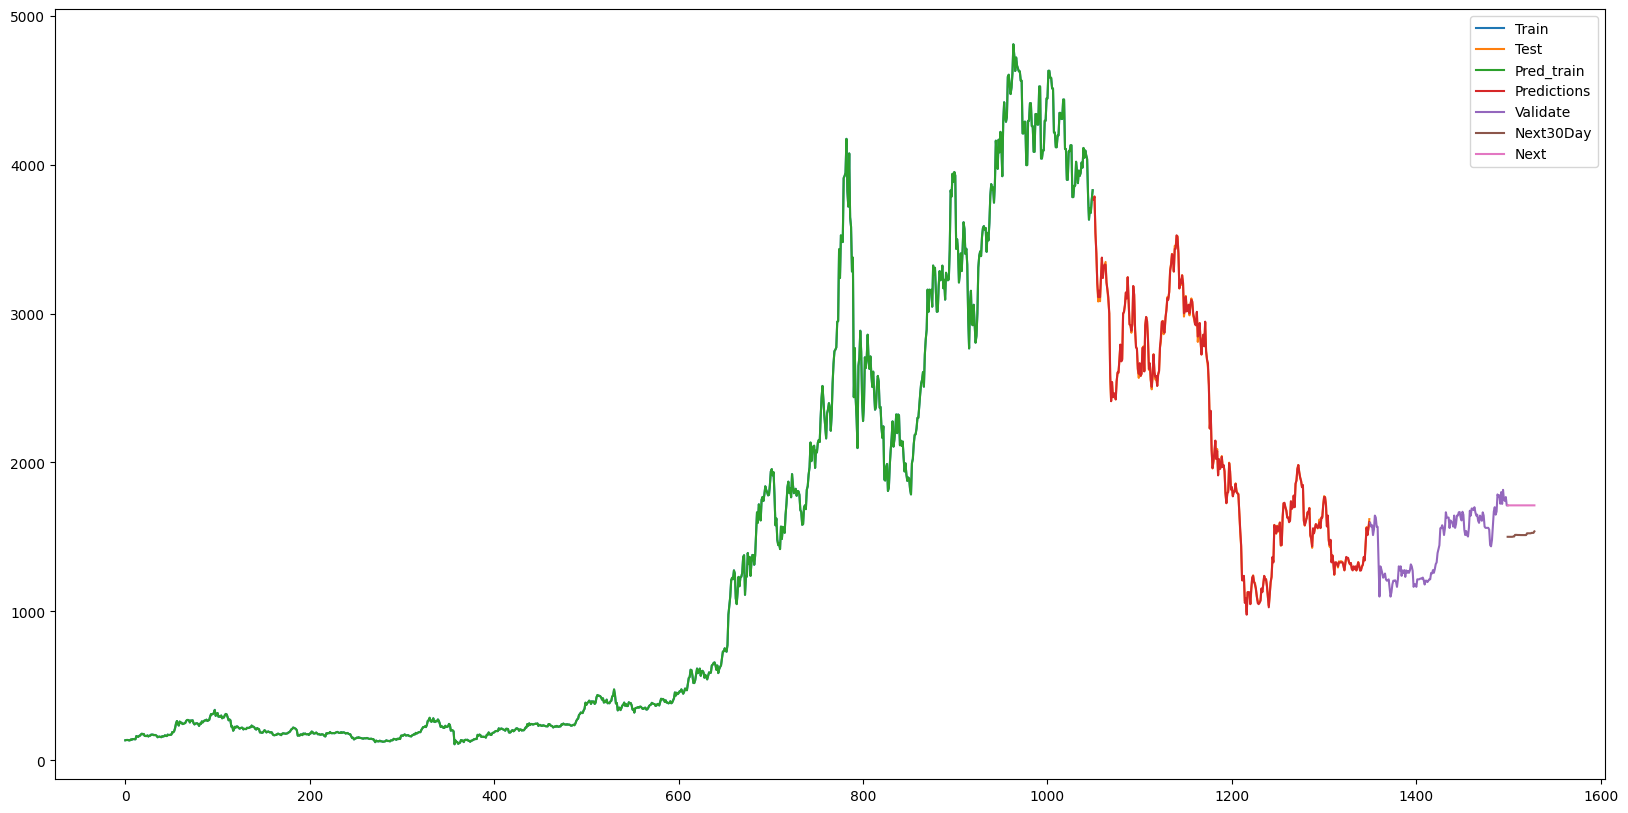

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


# 9.Vẽ hình
plt.subplots(figsize=(20,10))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(train_data.index, y_pred_train)
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.plot(last_data,future_data['Close'])
plt.legend(['Train', 'Test', 'Pred_train', 'Predictions','Validate','Next30Day', 'Next'])
plt.show()

Validation RMSE: 4.779075849904339
Testing RMSE: 8.544638805418563


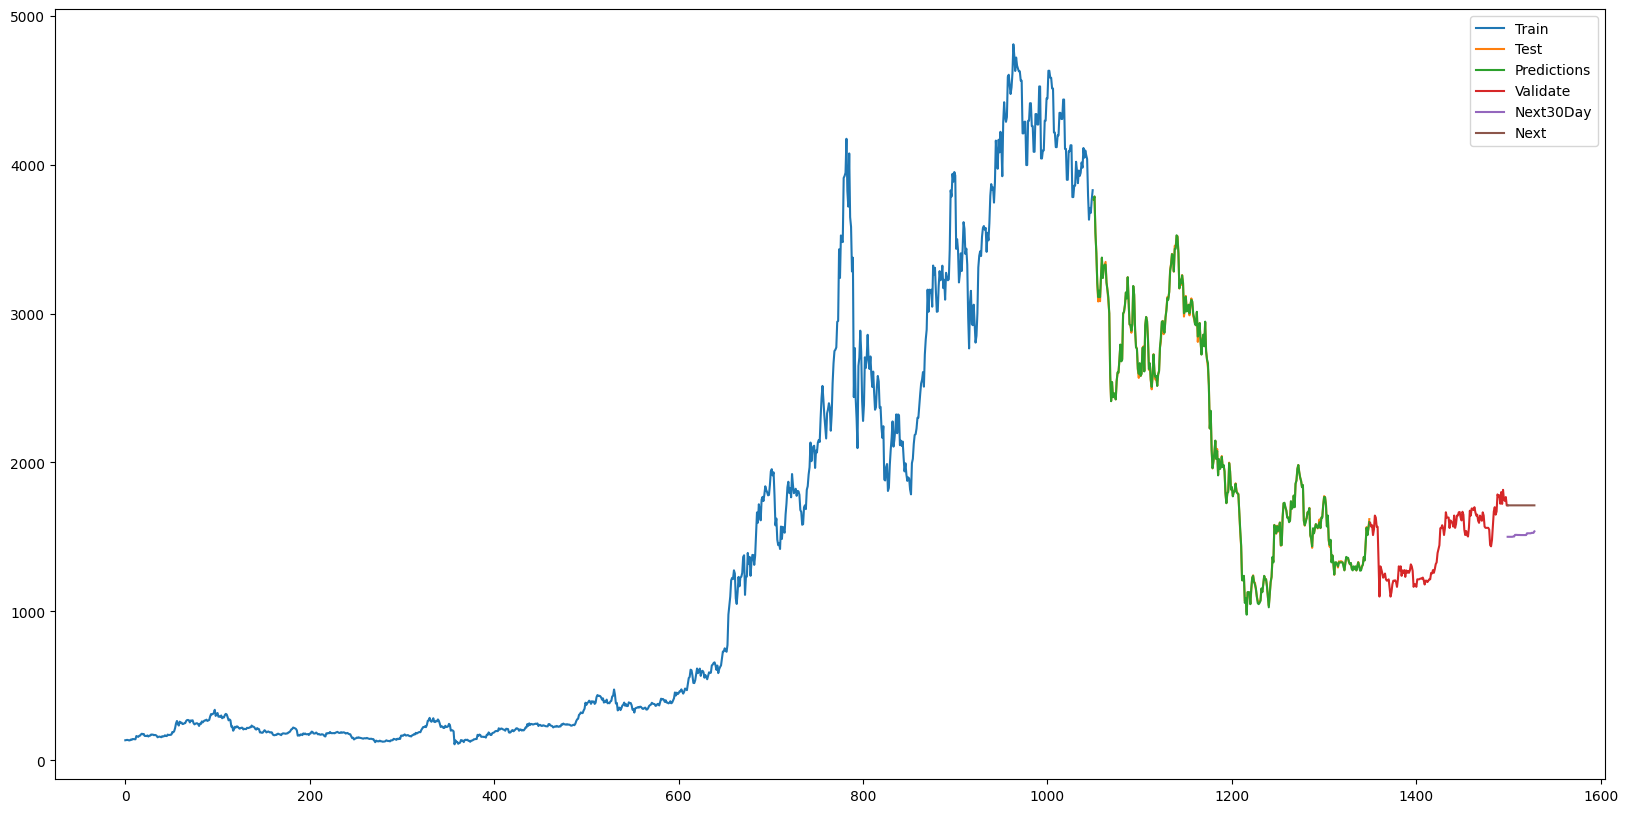

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.subplots(figsize=(20,10))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.plot(last_data,future_data['Close'])
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day', 'Next'])
plt.show()